# Video 1: Analyzing Stocks with Python - Complete Yahoo Finance Tutorial

**Duration:** ~15-20 minutes  
**GitHub:** [Your repo link]

---

### 🎬 Speaking Notes:
*"Hi everyone! Today I'm going to show you how to analyze stocks using Python and Yahoo Finance data. By the end of this tutorial, you'll know how to download stock data, calculate returns, analyze volatility, and compare different stocks. All the code will be available on GitHub."*

**[PAUSE - Show enthusiasm!]**

## Setup - Install Required Libraries

### 🎬 Speaking Notes:
*"First, let's install the libraries we need. If you already have these installed, you can skip this cell."*

In [ ]:
# Uncomment and run if needed:
# !pip install yfinance pandas numpy matplotlib seaborn

## Import Libraries

### 🎬 Speaking Notes:
*"Now let's import our libraries. yfinance will get our data, pandas for data manipulation, and matplotlib for visualization."*

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set plot style for better looking charts
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Download Stock Data

### 🎬 Speaking Notes:
*"Let's download data for four major tech stocks: Apple, Microsoft, Google, and Tesla. We'll get the last 2 years of data."*

**[EMPHASIZE]:** *"yfinance makes this incredibly easy - just one line of code!"*

In [19]:
# Define our stocks
tickers = ['AAPL', 'AMZN', 'MSFT', 'NVDA']

# Download data
start_date = '2023-01-01'
end_date = '2025-11-01'

data = yf.download(tickers, start = start_date, end = end_date)

# Let's look at the first few rows
print(f"\n📊 Downloaded {len(data)} days of data")
print(f"📅 Date range: {data.index[0].date()} to {data.index[-1].date()}")
data.head()

/var/folders/hm/j8y944ps01vg4t05w06cd4d00000gn/T/ipykernel_68406/2304837755.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = start_date, end = end_date)
[*********************100%***********************]  4 of 4 completed


📊 Downloaded 711 days of data
📅 Date range: 2023-01-03 to 2025-10-31


Price            Close                                          High  \
Ticker            AAPL       AMZN        MSFT       NVDA        AAPL   
Date                                                                   
2023-01-03  123.330650  85.820000  234.423599  14.301478  129.079567   
2023-01-04  124.602707  85.139999  224.169159  14.735070  126.870724   
2023-01-05  123.281334  83.120003  217.525253  14.251527  125.993089   
2023-01-06  127.817368  86.080002  220.088898  14.844966  128.478048   
2023-01-09  128.340012  87.360001  222.231750  15.613239  131.554685   

Price                                                Low             \
Ticker           AMZN        MSFT       NVDA        AAPL       AMZN   
Date                                                                  
2023-01-03  86.959999  240.460803  14.981836  122.443165  84.209999   
2023-01-04  86.980003  227.858008  14.838972  123.340509  83.360001   
2023-01-05  85.419998  222.652479  14.550244  123.024955  83.070000   
2023-01-06  86.400002  220.901036  14.995823  123.153152  81.430000   
2023-01-09  89.480003  226.263087  16.040835  128.083633  87.080002   

Price                                    Open                         \
Ticker            MSFT       NVDA        AAPL       AMZN        MSFT   
Date                                                                   
2023-01-03  232.290511  14.082685  128.468194  85.459999  237.848270   
2023-01-04  221.096741  14.227551  125.125335  86.550003  227.280710   
2023-01-05  216.987088  14.134637  125.361991  85.330002  222.310006   
2023-01-06  214.629007  14.020745  124.257579  83.029999  218.200444   
2023-01-09  221.537040  15.126699  128.655569  87.459999  221.576173   

Price                     Volume                                 
Ticker           NVDA       AAPL      AMZN      MSFT       NVDA  
Date                                                             
2023-01-03  14.836972  112117500  76706000  25740000  401277000  
2023-01-04  14.553243   89113600  68885100  50623400  431324000  
2023-01-05  14.477313   80962700  67930800  39585600  389168000  
2023-01-06  14.460329   87754700  83303400  43613600  405044000  
2023-01-09  15.269564   70790800  65266100  27369800  504231000

## Extract Closing Prices

### 🎬 Speaking Notes:
*"For most of our analysis, we'll focus on closing prices. Let's extract those into a cleaner dataframe."*

In [20]:
# Get closing prices
close_prices = data['Close']

# Here's what our closing prices look like
close_prices.tail(10)

Ticker,AAPL,AMZN,MSFT,NVDA
Date,,,,
2025-10-20,262.239990,216.479996,516.789978,182.639999
2025-10-21,262.769989,222.029999,517.659973,181.160004
2025-10-22,258.450012,217.949997,520.539978,180.279999
2025-10-23,259.579987,221.089996,520.559998,182.160004
2025-10-24,262.820007,224.210007,523.609985,186.259995
2025-10-27,268.809998,226.970001,531.520020,191.490005
2025-10-28,269.000000,229.250000,542.070007,201.029999
2025-10-29,269.700012,230.300003,541.549988,207.039993
2025-10-30,271.399994,222.860001,525.760010,202.889999


## Analysis 1: Price Performance Comparison

### 🎬 Speaking Notes:
*"First, let's compare how these stocks performed. To make a fair comparison, we'll normalize all prices to start at 100. This shows percentage changes from the starting point."*

**[KEY POINT]:** *"This is how professional investors compare investments!"*

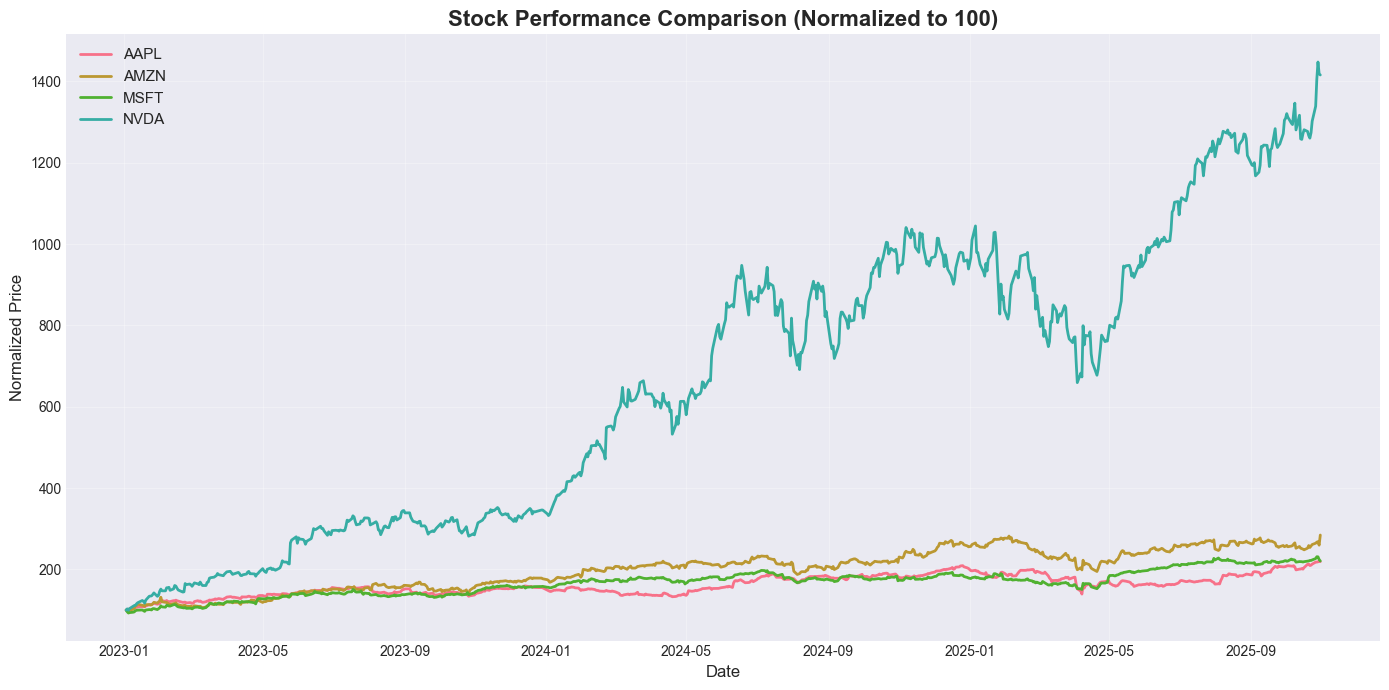


📈 Final Performance (% change):
AAPL: +119.22%
AMZN: +184.57%
MSFT: +120.89%
NVDA: +1315.87%


In [21]:
# Normalize prices to 100
normalized = (close_prices / close_prices.iloc[0]) * 100

# Create the plot
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(normalized.index, normalized[ticker], label=ticker, linewidth=2)

plt.title('Stock Performance Comparison (Normalized to 100)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print final performance
print("\n📈 Final Performance (% change):")
performance = ((close_prices.iloc[-1] / close_prices.iloc[0]) - 1) * 100
for ticker in tickers:
    print(f"{ticker}: {performance[ticker]:+.2f}%")

## Analysis 2: Daily Returns & Volatility

### 🎬 Speaking Notes:
*"Now let's calculate daily returns. This shows how much the stock price changed each day as a percentage. This is crucial for understanding risk."*

**[EMPHASIZE]:** *"Higher returns are great, but they often come with higher risk!"*

In [22]:
# Calculate daily returns
returns = close_prices.pct_change().dropna()

# Let's look at the statistics
print("\n📊 Return Statistics (Daily %):\n")
print(returns.describe() * 100)  # Convert to percentage

# Calculate annualized metrics
annual_returns = returns.mean() * 252  # 252 trading days
annual_volatility = returns.std() * np.sqrt(252)

print("\n📅 Annualized Metrics:")
print(f"\n{'Stock':<8} {'Return':<12} {'Volatility':<12}")
print("-" * 35)
for ticker in tickers:
    print(f"{ticker:<8} {annual_returns[ticker]*100:>10.2f}% {annual_volatility[ticker]*100:>10.2f}%")


📊 Return Statistics (Daily %):

Ticker          AAPL          AMZN          MSFT          NVDA
count   71000.000000  71000.000000  71000.000000  71000.000000
mean        0.124032      0.167927      0.122479      0.424399
std         1.646094      2.031103      1.474609      3.203876
min        -9.245607     -8.979129     -6.180897    -16.968165
25%        -0.668726     -0.946102     -0.669150     -1.319622
50%         0.158761      0.079846      0.126179      0.383805
75%         0.901191      1.335254      0.927889      2.200619
max        15.328847     11.977032     10.133687     24.369616

📅 Annualized Metrics:

Stock    Return       Volatility  
-----------------------------------
AAPL          31.26%      26.13%
AMZN          42.32%      32.24%
MSFT          30.86%      23.41%
NVDA         106.95%      50.86%


## Visualize Returns Distribution

### 🎬 Speaking Notes:
*"Let's visualize the distribution of daily returns. This histogram shows how often we see different return levels."*

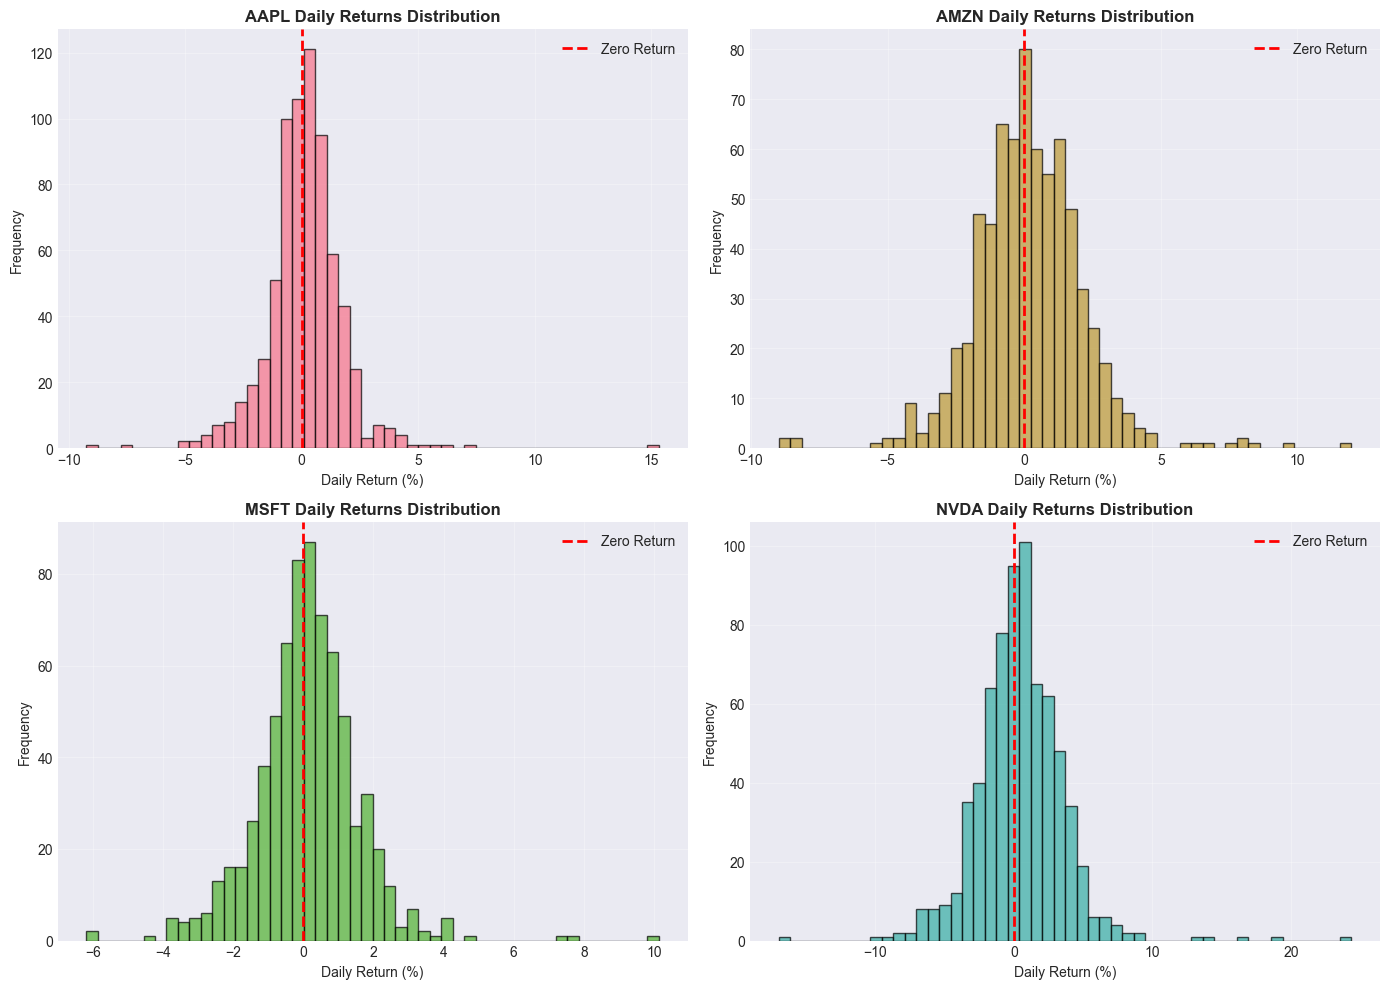


💡 Notice how most returns cluster around zero, but there are tails on both sides - these are the big up and down days.


In [23]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, ticker in enumerate(tickers):
    axes[i].hist(returns[ticker] * 100, bins=50, alpha=0.7, color=f'C{i}', edgecolor='black')
    axes[i].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Return')
    axes[i].set_title(f'{ticker} Daily Returns Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Daily Return (%)', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Notice how most returns cluster around zero, but there are tails on both sides - these are the big up and down days.")

## Analysis 3: Moving Averages

### 🎬 Speaking Notes:
*"Moving averages are one of the most popular technical indicators. Let's calculate the 50-day and 200-day moving averages. When the 50-day crosses above the 200-day, traders call it a 'Golden Cross' - a bullish signal!"*

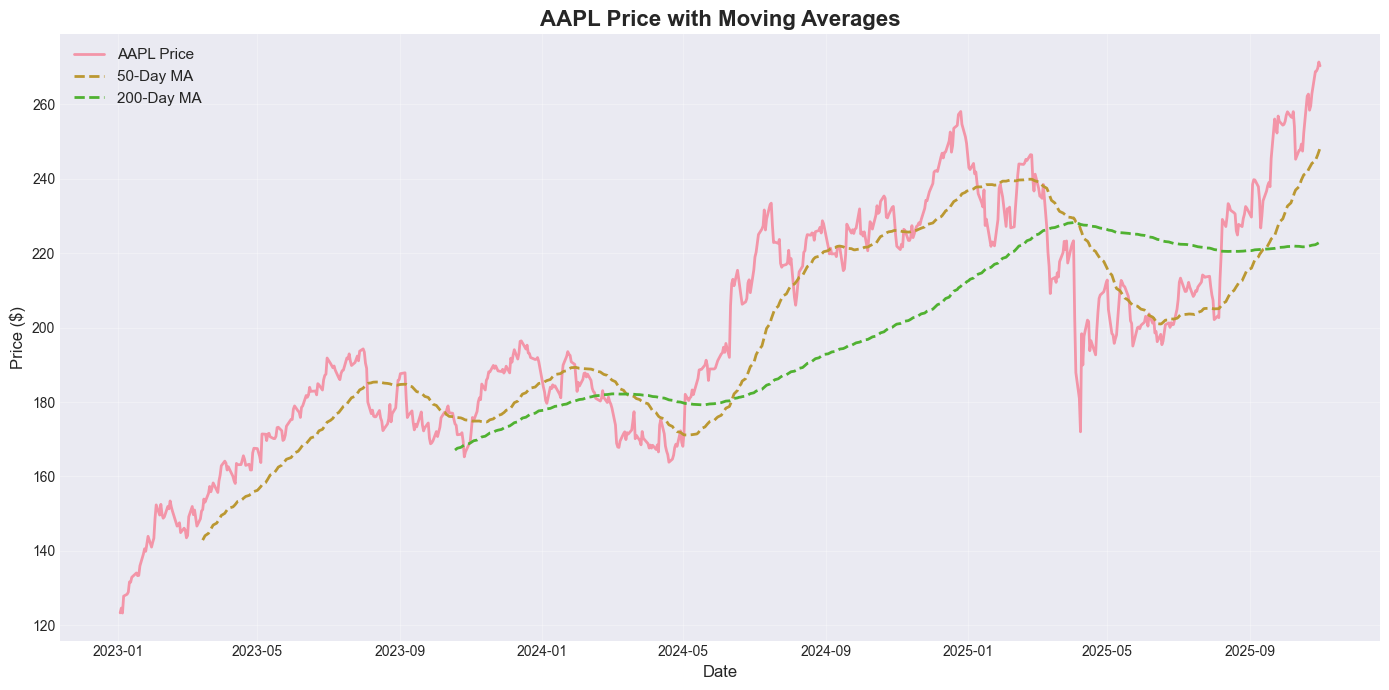


💡 The moving averages smooth out price fluctuations and help identify trends.


In [24]:
# Let's focus on Apple for this example
ticker_focus = 'AAPL'
apple_data = close_prices[ticker_focus].to_frame()

# Calculate moving averages
apple_data['MA50'] = apple_data[ticker_focus].rolling(window=50).mean()
apple_data['MA200'] = apple_data[ticker_focus].rolling(window=200).mean()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(apple_data.index, apple_data[ticker_focus], label='AAPL Price', linewidth=2, alpha=0.7)
plt.plot(apple_data.index, apple_data['MA50'], label='50-Day MA', linewidth=2, linestyle='--')
plt.plot(apple_data.index, apple_data['MA200'], label='200-Day MA', linewidth=2, linestyle='--')

plt.title(f'{ticker_focus} Price with Moving Averages', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 The moving averages smooth out price fluctuations and help identify trends.")

## Analysis 4: Risk vs Return

### 🎬 Speaking Notes:
*"Finally, let's create a risk-return scatter plot. This is what portfolio managers look at - they want high returns with low risk. The best stocks are in the top-left corner."*

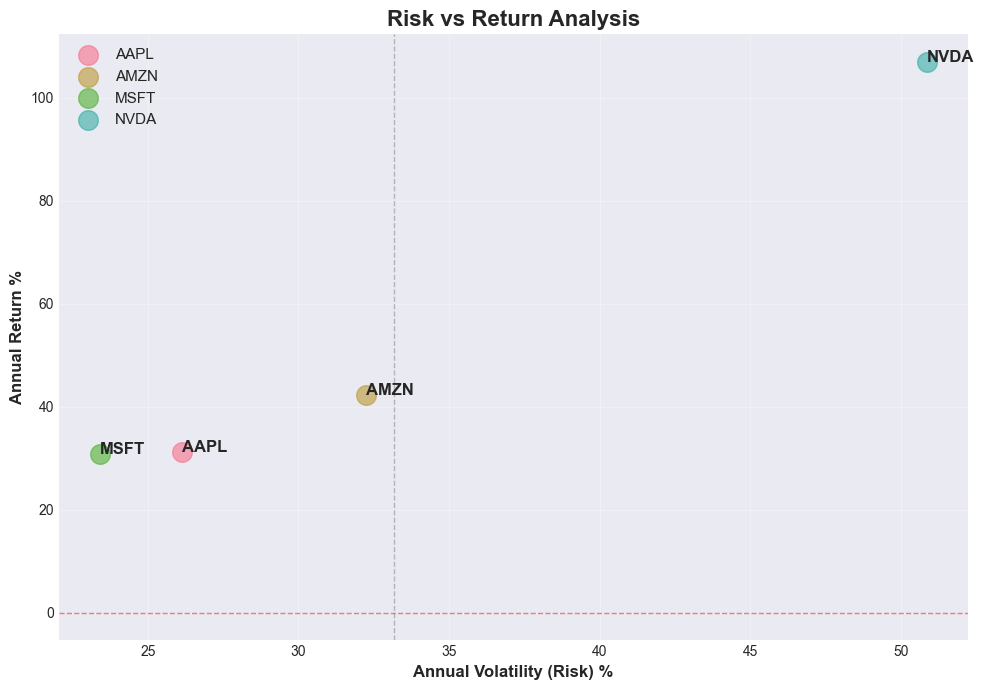


💡 This chart tells us which stocks gave the best risk-adjusted returns over our time period.


In [25]:
plt.figure(figsize=(10, 7))

# Plot each stock
for ticker in tickers:
    plt.scatter(
        annual_volatility[ticker] * 100, 
        annual_returns[ticker] * 100,
        s=200, 
        alpha=0.6,
        label=ticker
    )
    # Add labels
    plt.annotate(
        ticker, 
        (annual_volatility[ticker] * 100, annual_returns[ticker] * 100),
        fontsize=12, 
        fontweight='bold'
    )

plt.xlabel('Annual Volatility (Risk) %', fontsize=12, fontweight='bold')
plt.ylabel('Annual Return %', fontsize=12, fontweight='bold')
plt.title('Risk vs Return Analysis', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.axvline(annual_volatility.mean() * 100, color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("\n💡 This chart tells us which stocks gave the best risk-adjusted returns over our time period.")

## Bonus: Correlation Analysis

### 🎬 Speaking Notes:
*"As a bonus, let's look at how correlated these stocks are. High correlation means they tend to move together."*

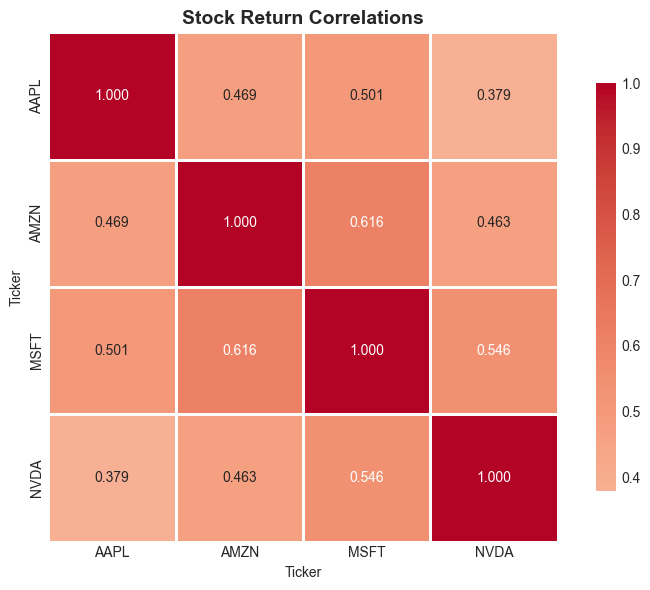


💡 Values close to 1 mean stocks move together. This is important for portfolio diversification!


In [26]:
# Calculate correlation matrix
correlation = returns.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation, 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt='.3f',
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Stock Return Correlations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Values close to 1 mean stocks move together. This is important for portfolio diversification!")

## Key Takeaways & Conclusion

### 🎬 Speaking Notes:
*"Let's summarize what we learned today:"*

In [27]:
print("\n" + "="*60)
print("📚 KEY TAKEAWAYS")
print("="*60)
print("\n1. ✅ How to download stock data using yfinance")
print("2. ✅ How to normalize prices for fair comparison")
print("3. ✅ How to calculate returns and volatility")
print("4. ✅ How to use moving averages for trend analysis")
print("5. ✅ How to analyze risk vs return tradeoffs")
print("6. ✅ How to check correlations between stocks")

print("\n" + "="*60)
print("🎯 NEXT STEPS")
print("="*60)
print("\n• Try this analysis with different stocks")
print("• Experiment with different time periods")
print("• Look into other technical indicators")
print("• Build your own stock screener")

print("\n" + "="*60)
print("💻 Get the code: [Your GitHub link]")
print("📺 Next video: Building a Stock Screener in Python")
print("👍 Don't forget to subscribe!")
print("="*60)


📚 KEY TAKEAWAYS

1. ✅ How to download stock data using yfinance
2. ✅ How to normalize prices for fair comparison
3. ✅ How to calculate returns and volatility
4. ✅ How to use moving averages for trend analysis
5. ✅ How to analyze risk vs return tradeoffs
6. ✅ How to check correlations between stocks

🎯 NEXT STEPS

• Try this analysis with different stocks
• Experiment with different time periods
• Look into other technical indicators
• Build your own stock screener

💻 Get the code: [Your GitHub link]
📺 Next video: Building a Stock Screener in Python
👍 Don't forget to subscribe!


### 🎬 Closing:
*"Thanks for watching! In the next video, we'll build a stock screener that automatically finds interesting stocks based on criteria you define. Make sure to subscribe so you don't miss it. See you next time!"*

---

**END OF TUTORIAL**